In [2]:
#importing required libraries
import torch
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

In [1]:
import tensorflow as tf; print(tf.__version__)

2.7.0


In [3]:
coviddata = pd.read_csv("covid-19_symptoms_dataset.csv")

print(coviddata.shape)



(2575, 6)


In [4]:
print(coviddata.head())

   fever  bodyPain  age  runnyNose  diffBreath  infectionProb
0    102         0    9          0          -1              0
1    102         0   10          0           0              1
2    104         0   33          1          -1              0
3    101         1   59          0           1              0
4     99         0   98          0           0              0


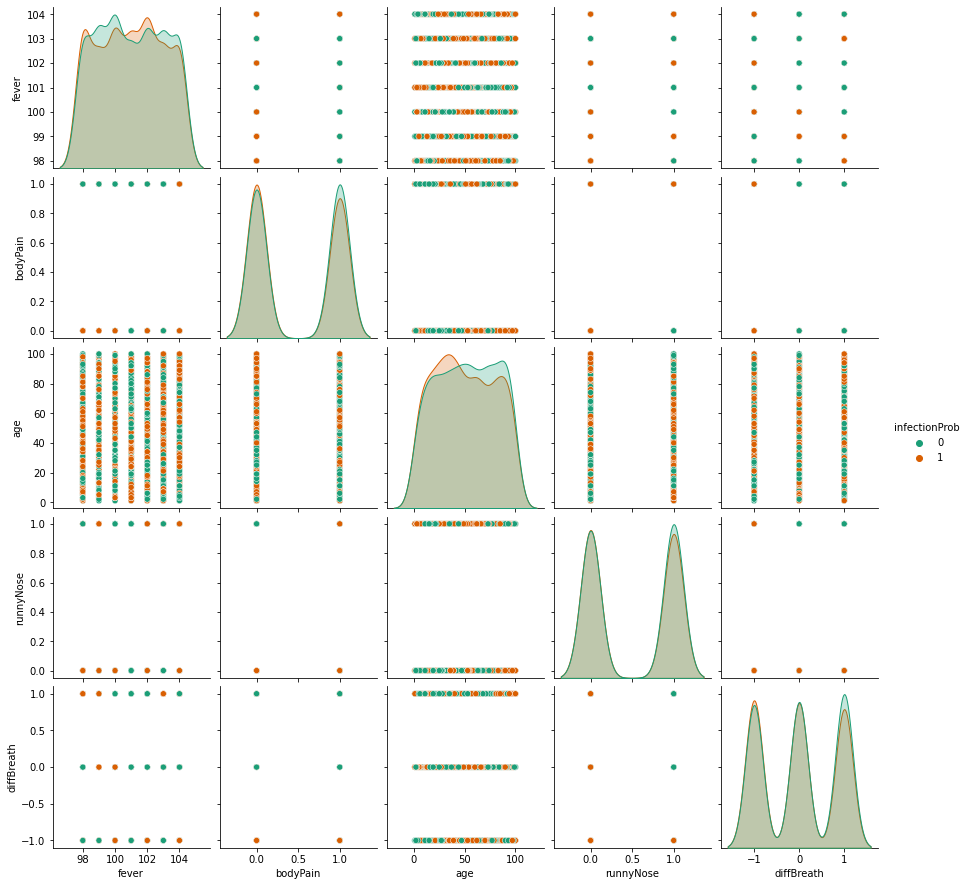

In [7]:
sns.pairplot(coviddata,hue='infectionProb',palette='Dark2')

In [5]:
corr=coviddata.corr()

<AxesSubplot:>

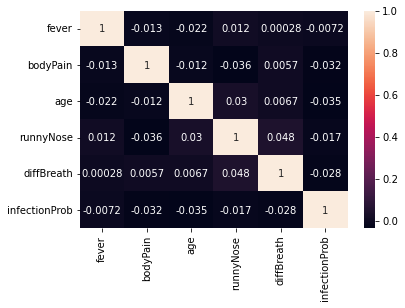

In [10]:
sns.heatmap(corr,annot=True)

In [5]:
X = coviddata.drop('infectionProb', axis=1)
y = coviddata['infectionProb']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [8]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[115 135]
 [133 132]]
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       250
           1       0.49      0.50      0.50       265

    accuracy                           0.48       515
   macro avg       0.48      0.48      0.48       515
weighted avg       0.48      0.48      0.48       515



In [15]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

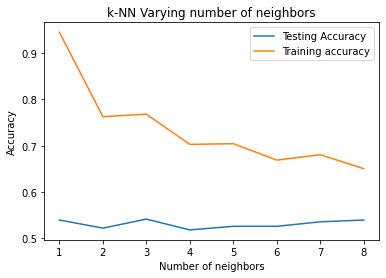

In [17]:
import matplotlib.pyplot as plt
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
knn.score(X_test,y_test)

0.5359223300970873

In [20]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[145, 112],
       [127, 131]])

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55       257
           1       0.54      0.51      0.52       258

    accuracy                           0.54       515
   macro avg       0.54      0.54      0.54       515
weighted avg       0.54      0.54      0.54       515



Root mean squared erro for training Data

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [19]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54       250
           1       0.51      0.38      0.44       265

    accuracy                           0.50       515
   macro avg       0.50      0.50      0.49       515
weighted avg       0.50      0.50      0.49       515



In [20]:

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

Perceptron()

In [21]:
pred_perceptron = clf.predict(X_test)
print(classification_report(y_test,pred_perceptron))

              precision    recall  f1-score   support

           0       0.49      1.00      0.65       250
           1       0.00      0.00      0.00       265

    accuracy                           0.49       515
   macro avg       0.24      0.50      0.33       515
weighted avg       0.24      0.49      0.32       515



/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
